### This notebook will be maily used for the Capstone Project.

In [1]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## PART 1

### Importing the reqired libraries

In [144]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [64]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from bs4 import BeautifulSoup
import lxml

In [4]:
from lxml.html.soupparser import fromstring

In [5]:
from lxml.etree import tostring

### Getting the data of Toronto from the wikipedia page and converting it into a dataframe.

In [98]:
from pandas.io.html import read_html
url ='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
wiki = read_html(url , attrs={"class":"wikitable"})

In [99]:
wiki[0].head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Converting into csv

In [101]:
dfs = './Postal_Codes_Of_Canada.csv'
wiki[0].to_csv(dfs)

In [102]:
df = pd.read_csv(dfs)

In [103]:
df.head(15)

,Unnamed: 0,Postal Code,Borough,Neighborhood
0,0,M1A,Not assigned,NaN
1,1,M2A,Not assigned,NaN
2,2,M3A,North York,Parkwoods
3,3,M4A,North York,Victoria Village
4,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,7,M8A,Not assigned,NaN
8,8,M9A,Etobicoke,Islington Avenue
9,9,M1B,Scarborough,"Malvern, Rouge"


In [104]:
df.columns

Index(['Unnamed: 0', 'Postal Code', 'Borough', 'Neighborhood'], dtype='object')

### Dropping rows where Boroughs are Not assigned  

In [105]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [106]:
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


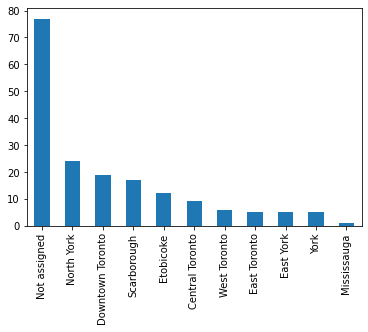

In [107]:
df['Borough'].value_counts().plot(kind='bar')

In [116]:
df = df[df.Borough != 'Not assigned']
df = df.reset_index(drop=True)


In [121]:
df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### Concatinating Duplicate Postal Code

In [123]:
df['Postal Code'].unique()

array(['M3A', 'M4A', 'M5A', 'M6A', 'M7A', 'M9A', 'M1B', 'M3B', 'M4B',
       'M5B', 'M6B', 'M9B', 'M1C', 'M3C', 'M4C', 'M5C', 'M6C', 'M9C',
       'M1E', 'M4E', 'M5E', 'M6E', 'M1G', 'M4G', 'M5G', 'M6G', 'M1H',
       'M2H', 'M3H', 'M4H', 'M5H', 'M6H', 'M1J', 'M2J', 'M3J', 'M4J',
       'M5J', 'M6J', 'M1K', 'M2K', 'M3K', 'M4K', 'M5K', 'M6K', 'M1L',
       'M2L', 'M3L', 'M4L', 'M5L', 'M6L', 'M9L', 'M1M', 'M2M', 'M3M',
       'M4M', 'M5M', 'M6M', 'M9M', 'M1N', 'M2N', 'M3N', 'M4N', 'M5N',
       'M6N', 'M9N', 'M1P', 'M2P', 'M4P', 'M5P', 'M6P', 'M9P', 'M1R',
       'M2R', 'M4R', 'M5R', 'M6R', 'M7R', 'M9R', 'M1S', 'M4S', 'M5S',
       'M6S', 'M1T', 'M4T', 'M5T', 'M1V', 'M4V', 'M5V', 'M8V', 'M9V',
       'M1W', 'M4W', 'M5W', 'M8W', 'M9W', 'M1X', 'M4X', 'M5X', 'M8X',
       'M4Y', 'M7Y', 'M8Y', 'M8Z'], dtype=object)

In [125]:
print("No of Postal Code :", df['Postal Code'].shape[0])
print("No of unique Postal Code's :", df['Postal Code'].nunique())
print("No of duplicates :", df['Postal Code'].shape[0] - df['Postal Code'].nunique())



No of Postal Code : 103
No of unique Postal Code's : 103
No of duplicates : 0


In [127]:
df = df.groupby(['Postal Code','Borough'])['Neighborhood'].apply(', '.join).reset_index()

In [142]:
df.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [132]:
df.shape

(103, 3)

## PART 2

### Latitude and Longitude

In [152]:
#This was taking a lot of time with connection lost

#import geocoder # import geocoder
#lat_lng_coords = None

#while(lat_lng_coords is None):
#    g = geocoder.google('{}, Toronto, Ontario'.format('postal code'))
#    lat_lng_coords = g.latlng

#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]

In [153]:
lat_long = pd.read_csv('Geospatial_Coordinates.csv')

In [154]:
lat_long.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Final Dataframe 

In [157]:
lat_long.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

In [158]:
df.columns

Index(['Postal Code', 'Borough', 'Neighborhood'], dtype='object')

In [159]:
final_df = pd.merge(left=df, right=lat_long)

In [160]:
final_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [161]:
final_df.shape

(103, 5)

## PART 3

### Exploring the neighborhood in Toronto with visualisation

In [173]:
toronto = final_df[final_df['Borough']=='Downtown Toronto'].reset_index(drop=True)
toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [165]:
address = 'Downtown Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


In [174]:
# create map of Downtown Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto['Latitude'], toronto['Longitude'], toronto['Borough'], toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Clustering the neighborhood in Toronto with visualisation

In [180]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = ''
VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('ACCESS_TOKEN:' + ACCESS_TOKEN)


Your credentails:
CLIENT_ID: 5BT2N1N1DSSXENPEJWLUIPPA2KCTT423PLTW3FMYQYNRY2NV
CLIENT_SECRET:UHJ5B5FQC4OMSDE23OZVD00JFUQSJWAIIG01ZUQFJQRZKWM1
ACCESS_TOKEN:W44LGQQGTIGUOL40ZH45K2EVL401E2SNAJ21NUEP1QFHPAHN


In [181]:
search_query = 'Italian'
radius = 500
print(search_query + ' .... OK!')

Italian .... OK!


In [211]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)


In [183]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec2193169babe001be3712a'},
 'response': {'venues': [{'id': '4c787c9181bca0936180fa14',
    'name': 'Classic italian style pizza food truck',
    'location': {'address': 'CNE Midway',
     'lat': 43.652144,
     'lng': -79.381118,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.652144,
       'lng': -79.381118}],
     'distance': 227,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['CNE Midway', 'Toronto ON', 'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1cb941735',
      'name': 'Food Truck',
      'pluralName': 'Food Trucks',
      'shortName': 'Food Truck',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1589778847',
    'hasPerk': False},
   {'id': '573df789498e03dd8e54b166',
    'name': 'Mustachio Italian Eatery',
    'location': {'address': '595 Bay St

In [184]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [176]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [186]:
toronto_venues = getNearbyVenues(names=toronto['Neighborhood'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )



Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government


In [187]:
print(toronto_venues.shape)
toronto_venues.head()

(517, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,"St. James Town, Cabbagetown",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner


In [188]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,30,30,30,30,30,30
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,30,30,30,30,30,30
Christie,16,16,16,16,16,16
Church and Wellesley,30,30,30,30,30,30
"Commerce Court, Victoria Hotel",30,30,30,30,30,30
"First Canadian Place, Underground city",30,30,30,30,30,30
"Garden District, Ryerson",30,30,30,30,30,30
"Harbourfront East, Union Station, Toronto Islands",30,30,30,30,30,30


### Analyzing each neighborhood

In [215]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distribution Center,Electronics Store,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Fish Market,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Gaming Cafe,Gastropub,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hobby Shop,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Lake,Liquor Store,Lounge,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pizza Place,Plane,Playground,Plaza,Poke Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"St. James Town, Cabbagetown",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [214]:
toronto_onehot.shape

(517, 147)

In [216]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distribution Center,Electronics Store,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Fish Market,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Gaming Cafe,Gastropub,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hobby Shop,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Lake,Liquor Store,Lounge,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pizza Place,Plane,Playground,Plaza,Poke Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.0000,0.033333,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.0000,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.000000,0.033333,0.000000,0.000000,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

### Neighborhood with 5 most common venues

In [217]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0            Beer Bar  0.07
1         Coffee Shop  0.07
2        Cocktail Bar  0.07
3  Seafood Restaurant  0.07
4                Café  0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3       Coffee Shop  0.06
4           Airport  0.06


----Central Bay Street----
            venue  freq
0     Coffee Shop  0.23
1            Café  0.07
2     Yoga Studio  0.03
3            Park  0.03
4  Sandwich Place  0.03


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3    Coffee Shop  0.06
4          Diner  0.06


----Church and Wellesley----
               venue  freq
0  Indian Restaurant  0.03
1           Beer Bar  0.03
2         Smoke Shop  0.03
3       Dance Studio  0.03
4     Breakfast Spot  0.03


----Commerce C

### Converting to a pandas dataframe

In [218]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [219]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Seafood Restaurant,Coffee Shop,Beer Bar,Cocktail Bar,Breakfast Spot,Bistro,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Basketball Stadium,Jazz Club
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Plane,Harbor / Marina,Sculpture Garden,Boutique,Coffee Shop,Rental Car Location,Boat or Ferry
2,Central Bay Street,Coffee Shop,Café,Yoga Studio,Spa,Sandwich Place,Ramen Restaurant,Poke Place,Bubble Tea Shop,Park,Modern European Restaurant
3,Christie,Grocery Store,Café,Park,Italian Restaurant,Restaurant,Coffee Shop,Diner,Candy Store,Nightclub,Baby Store
4,Church and Wellesley,Park,Smoke Shop,Creperie,Indian Restaurant,Salon / Barbershop,Japanese Restaurant,Restaurant,Bookstore,Ramen Restaurant,Pub


### Cluster neighborhood

In [220]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 2, 3, 1, 1, 1, 1, 1, 1], dtype=int32)

In [221]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Park,Playground,Trail,Wine Bar,Colombian Restaurant,Dance Studio,Creperie,Cosmetics Shop,Concert Hall,Comic Shop
1,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,1,Restaurant,Italian Restaurant,Café,Coffee Shop,Bakery,Caribbean Restaurant,Indian Restaurant,Japanese Restaurant,Deli / Bodega,Jewelry Store
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Park,Smoke Shop,Creperie,Indian Restaurant,Salon / Barbershop,Japanese Restaurant,Restaurant,Bookstore,Ramen Restaurant,Pub
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2,Coffee Shop,Park,Breakfast Spot,Theater,Bakery,Yoga Studio,Event Space,Dessert Shop,Chocolate Shop,Pub
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Café,Theater,Coffee Shop,Burger Joint,Ramen Restaurant,Restaurant,College Rec Center,Plaza,Sandwich Place,Music Venue


In [223]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [224]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Park,Playground,Trail,Wine Bar,Colombian Restaurant,Dance Studio,Creperie,Cosmetics Shop,Concert Hall,Comic Shop


In [225]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,1,Restaurant,Italian Restaurant,Café,Coffee Shop,Bakery,Caribbean Restaurant,Indian Restaurant,Japanese Restaurant,Deli / Bodega,Jewelry Store
2,Downtown Toronto,1,Park,Smoke Shop,Creperie,Indian Restaurant,Salon / Barbershop,Japanese Restaurant,Restaurant,Bookstore,Ramen Restaurant,Pub
4,Downtown Toronto,1,Café,Theater,Coffee Shop,Burger Joint,Ramen Restaurant,Restaurant,College Rec Center,Plaza,Sandwich Place,Music Venue
5,Downtown Toronto,1,Gastropub,Café,Coffee Shop,Cocktail Bar,BBQ Joint,New American Restaurant,Middle Eastern Restaurant,Cosmetics Shop,Creperie,Restaurant
6,Downtown Toronto,1,Seafood Restaurant,Coffee Shop,Beer Bar,Cocktail Bar,Breakfast Spot,Bistro,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Basketball Stadium,Jazz Club
8,Downtown Toronto,1,Coffee Shop,Café,Seafood Restaurant,Concert Hall,Japanese Restaurant,Deli / Bodega,Lounge,Plaza,Colombian Restaurant,Hotel
9,Downtown Toronto,1,Park,Plaza,Hotel,Performing Arts Venue,Salad Place,Ice Cream Shop,Skating Rink,Dance Studio,Italian Restaurant,Japanese Restaurant
11,Downtown Toronto,1,Café,Gastropub,Deli / Bodega,Japanese Restaurant,Coffee Shop,Restaurant,Bakery,Bookstore,Museum,Pub
12,Downtown Toronto,1,Café,Bookstore,Bar,Bakery,Japanese Restaurant,Italian Restaurant,Restaurant,Yoga Studio,Sushi Restaurant,Sandwich Place
13,Downtown Toronto,1,Café,Dessert Shop,Bakery,Mexican Restaurant,Vietnamese Restaurant,Farmers Market,Organic Grocery,Noodle House,Jazz Club,Gourmet Shop


In [226]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Downtown Toronto,2,Coffee Shop,Park,Breakfast Spot,Theater,Bakery,Yoga Studio,Event Space,Dessert Shop,Chocolate Shop,Pub
7,Downtown Toronto,2,Coffee Shop,Café,Yoga Studio,Spa,Sandwich Place,Ramen Restaurant,Poke Place,Bubble Tea Shop,Park,Modern European Restaurant
10,Downtown Toronto,2,Café,Coffee Shop,Japanese Restaurant,Beer Bar,Gastropub,Deli / Bodega,Sandwich Place,Pub,Concert Hall,Bakery
18,Downtown Toronto,2,Coffee Shop,Sushi Restaurant,Yoga Studio,Italian Restaurant,Park,Café,Mexican Restaurant,Burrito Place,Creperie,Diner


In [227]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Downtown Toronto,3,Grocery Store,Café,Park,Italian Restaurant,Restaurant,Coffee Shop,Diner,Candy Store,Nightclub,Baby Store


In [229]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,4,Airport Service,Airport Lounge,Airport Terminal,Plane,Harbor / Marina,Sculpture Garden,Boutique,Coffee Shop,Rental Car Location,Boat or Ferry
